In [1]:
import torch
import pandas as pd
import numpy as np

In [13]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [52]:
train_data = train_df.drop('ID', axis = 1)

In [53]:
columns_change = ['Signup_Length', 'Voice_mail_usage',\
                  'Noon_len','Noon_calling_cnt','Noon_fee',\
                  'Late_len', 'Late_calling_cnt','Late_fee',\
                  'Night_len','Night_calling_cnt','Night_fee',\
                  'Counseling_cnt','Cancel_status']
train_data.columns = columns_change

In [54]:
# 시간대 별 묶음음
# 요금 = 분당 요금금
train_data['total_call_time'] = train_data['Noon_len'] + train_data['Late_len'] + train_data['Night_len']
train_data['total_call_cnt'] = train_data['Noon_calling_cnt'] + train_data['Late_calling_cnt'] + train_data['Night_calling_cnt']

# total fee를 계산
train_data['total_call_fee'] = train_data['Noon_fee'] + train_data['Late_fee']+train_data['Night_fee']
train_data['noon_rate'] = train_data['noon_fee'] / train_data['noon_len']
train_data['late_rate'] = train_data['late_fee'] / train_data['late_len']
train_data['night_rate'] = train_data['night_fee'] / train_data['night_len']

train_data['noon_per_night_len'] = (train_data['Noon_len'] + train_data['Late_len'] )/ train_data['Late_len']
train_data['noon_per_night_fee'] = (train_data['Noon_fee'] + train_data['Late_fee'] )/ train_data['Late_fee']

train_data['voice_mail_since_sign'] = train_data['Voice_mail_usage'] / train_data['Signup_Length']
train_data['consult_since_sign'] = train_data['Counseling_cnt'] / train_data['Signup_Length']

train_data['voice_mail_fee'] = train_data['Voice_mail_usage'] / train_data['total_call_fee']
train_data['consult_fee'] = train_data['Counseling_cnt'] / train_data['total_call_fee']

#
train_data.loc[train_data['Signup_Length'] > 475, 'Signup_Length'] = 475
train_data.loc[train_data['Voice_mail_usage'] > 55, 'Voice_mail_usage'] = 55
train_data = train_data.replace(np.inf,0)

In [19]:
train_data.describe()

,Signup_Length,Voice_mail_usage,Noon_len,Noon_calling_cnt,Noon_fee,Late_len,Late_calling_cnt,Late_fee,Night_len,Night_calling_cnt,...,dinner_total_fee,night_total_fee,total_call_fee,voice_mail_since_sign,consult_since_sign,total_service,voice_mail_fee,consult_fee,consult_time,consult_count
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,...,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,158.522781,11.332980,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,...,7171.744786,3392.980123,21519.731194,0.174770,0.033108,14.325894,0.000674,0.000128,0.014361,0.025239
std,112.825817,20.372378,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,...,4402.999707,3503.890008,12511.167846,0.896157,0.095500,25.030649,0.001720,0.000130,0.178541,0.053710
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,...,0.000000,25.272000,1344.014000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,...,5057.750250,1150.718750,13283.885750,0.000000,0.006920,2.000000,0.000000,0.000057,0.006112,0.007067
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,...,6074.372000,2201.248000,17106.119000,0.004545,0.009852,3.000000,0.000051,0.000110,0.008529,0.009901
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,...,8000.370000,4725.728000,26457.993250,0.099099,0.035242,24.000000,0.000885,0.000162,0.009773,0.028302
max,500.000000,75.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,...,23502.080000,21442.980000,83372.052000,40.500000,5.000000,1112.000000,0.114953,0.001935,20.000000,4.000000


<Axes: >

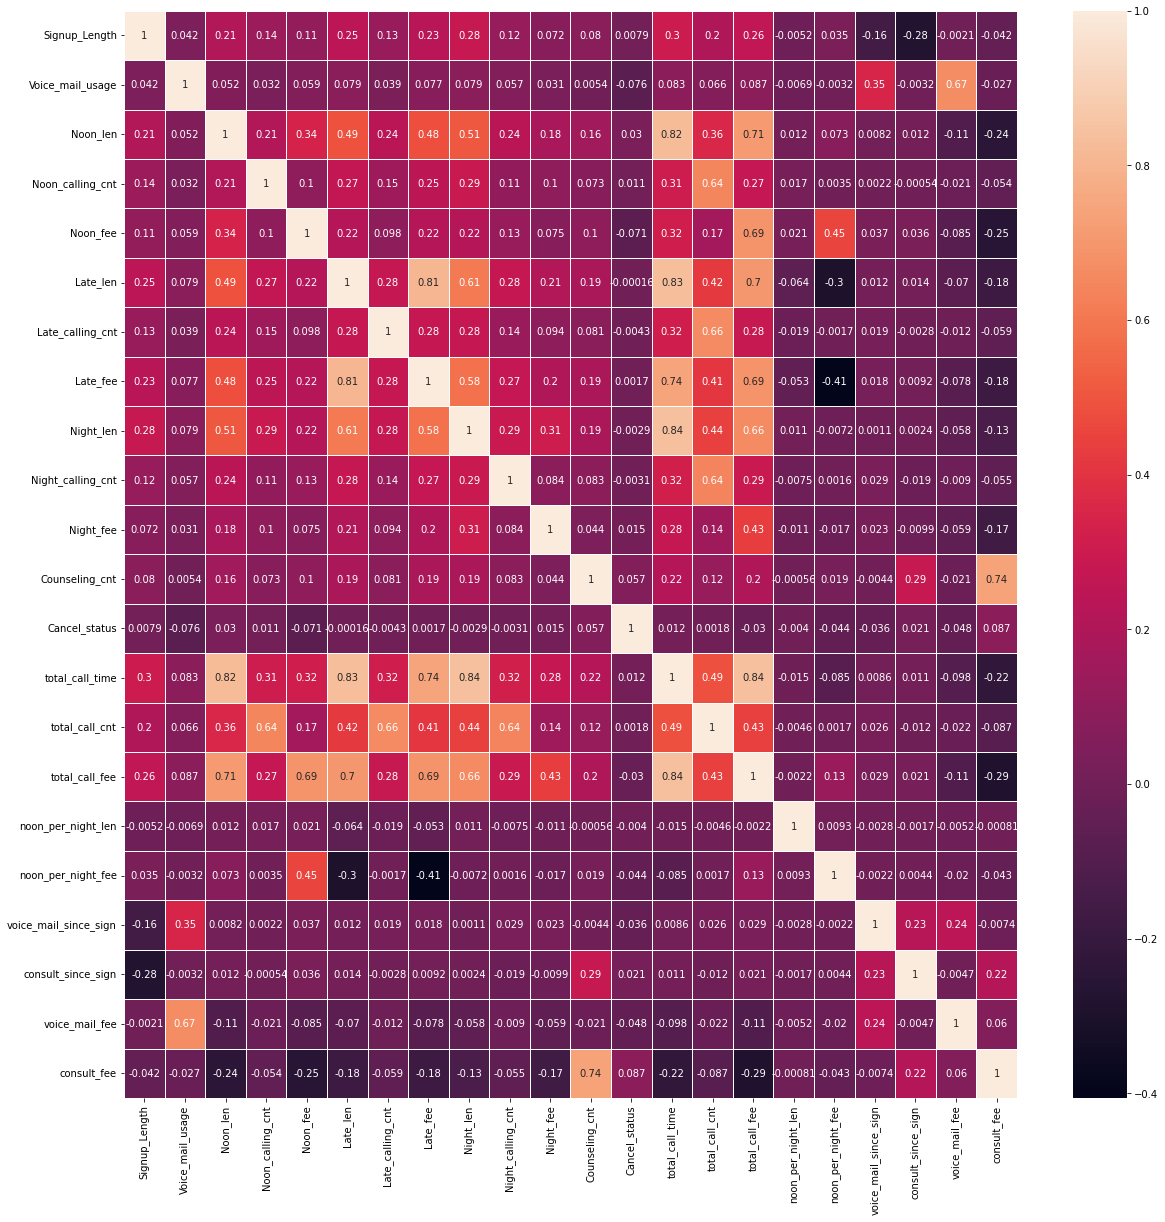

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
train_corr = train_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(train_corr, annot=True, linewidth=1)

In [26]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 KB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 KB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 KB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 KB 33.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Insta

In [56]:
from autogluon.tabular import TabularPredictor
train_datas = train_data
predictor = TabularPredictor(label = 'Cancel_status').fit(train_datas)

No path specified. Models will be saved in: "AutogluonModels/ag-20230322_070044/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230322_070044/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    30200
Train Data Columns: 21
Label Column: Cancel_status
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10637.86 MB
	Train Data (Or

[1000]	valid_set's binary_error: 0.0932
[2000]	valid_set's binary_error: 0.0836
[3000]	valid_set's binary_error: 0.0776
[4000]	valid_set's binary_error: 0.0752
[5000]	valid_set's binary_error: 0.0724
[6000]	valid_set's binary_error: 0.0716
[7000]	valid_set's binary_error: 0.072


	0.9292	 = Validation score   (accuracy)
	34.56s	 = Training   runtime
	1.41s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's binary_error: 0.0812
[2000]	valid_set's binary_error: 0.0756


	0.9264	 = Validation score   (accuracy)
	11.38s	 = Training   runtime
	0.47s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9176	 = Validation score   (accuracy)
	21.48s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9184	 = Validation score   (accuracy)
	24.24s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: CatBoost ...
	0.93	 = Validation score   (accuracy)
	168.93s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9172	 = Validation score   (accuracy)
	7.77s	 = Training   runtime
	0.36s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9168	 = Validation score   (accuracy)
	5.51s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.9024	 = Validation score   (accuracy)
	30.28s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: XGBoost ...
	0.92	 = Validation score   (accuracy)
	7.05s	 = Training   runtime
	0.07

[1000]	valid_set's binary_error: 0.0756


	0.928	 = Validation score   (accuracy)
	18.4s	 = Training   runtime
	0.5s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	0.9312	 = Validation score   (accuracy)
	2.62s	 = Training   runtime
	0.01s	 = Validation runtime
AutoGluon training complete, total runtime = 368.24s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230322_070044/")


In [57]:
test_data = test_df.drop('ID', axis = 1)
columns_change = ['Signup_Length', 'Voice_mail_usage',\
                  'Noon_len','Noon_calling_cnt','Noon_fee',\
                  'Late_len', 'Late_calling_cnt','Late_fee',\
                  'Night_len','Night_calling_cnt','Night_fee',\
                  'Counseling_cnt']
test_data.columns = columns_change
# 시간대 별 묶음음
test_data['total_call_time'] = test_data['Noon_len'] + test_data['Late_len'] + test_data['Night_len']
test_data['total_call_cnt'] = test_data['Noon_calling_cnt'] + test_data['Late_calling_cnt'] + test_data['Night_calling_cnt']
# total fee를 계산

test_data['total_call_fee'] =  test_data['Noon_len'] * test_data['Noon_fee'] +  test_data['Late_len'] * test_data['Late_fee']\
 + test_data['Night_len'] * test_data['Night_fee']

test_data['voice_mail_since_sign'] = test_data['Voice_mail_usage'] / test_data['Signup_Length']
test_data['consult_since_sign'] = test_data['Counseling_cnt'] / test_data['Signup_Length']

test_data['noon_per_night_len'] = (test_data['Noon_len'] + test_data['Late_len'] )/ test_data['Late_len']
test_data['noon_per_night_fee'] = (test_data['Noon_fee'] + test_data['Late_fee'] )/ test_data['Late_fee']

test_data['voice_mail_fee'] = test_data['Voice_mail_usage'] / test_data['total_call_fee']
test_data['consult_fee'] = test_data['Counseling_cnt'] / test_data['total_call_fee']

#
test_data.loc[test_data['Signup_Length'] > 475, 'Signup_Length'] = 475
test_data.loc[test_data['Voice_mail_usage'] > 55, 'Voice_mail_usage'] = 55
test_data = test_data.replace(np.inf,0)

In [58]:
prediction = predictor.predict(test_data)

In [59]:
print(prediction)

0        0
1        0
2        0
3        0
4        1
        ..
12938    0
12939    0
12940    0
12941    0
12942    0
Name: Cancel_status, Length: 12943, dtype: int64


In [60]:
submission = pd.read_csv('./sample_submission.csv')
submission.describe()

,전화해지여부
count,12943.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [61]:
cnt = 0;
for i in prediction:
  if i == 1:
    cnt +=1
print(cnt)

919


In [62]:
submission['전화해지여부'] = prediction
submission.to_csv('./submit.csv', index = False)